In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import RobustScaler


In [2]:
link = 'https://raw.githubusercontent.com/oxqlion/stroke_prediction_dataset/refs/heads/main/healthcare-dataset-stroke-data.csv'
store = pd.read_csv(link)

In [3]:
store.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(store.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
print(store.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool>


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6528\186248652.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(store['bmi'], shade=True)


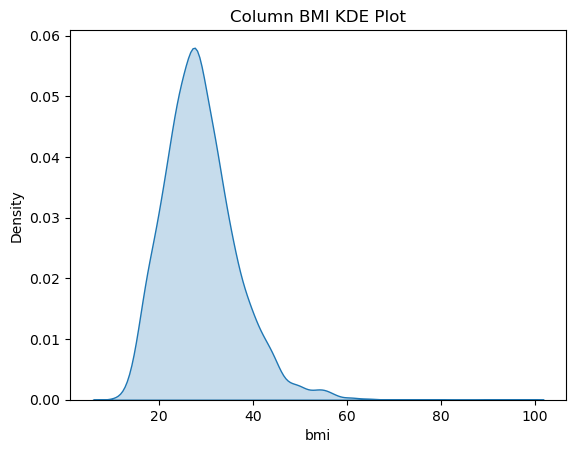

In [6]:
sns.kdeplot(store['bmi'], shade=True)
plt.title('Column BMI KDE Plot')
plt.show()

In [7]:
median_bmi = store['bmi'].median()
store['bmi'].fillna(median_bmi, inplace=True)

In [8]:
print(store.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
store.drop(columns=['id'],inplace = True)

In [10]:
print(store.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool>


Boxplots for Numerical Columns


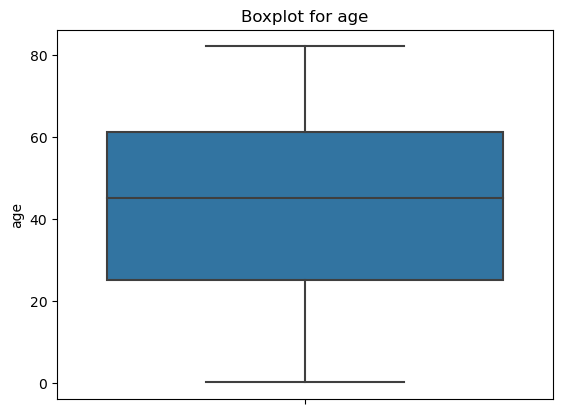

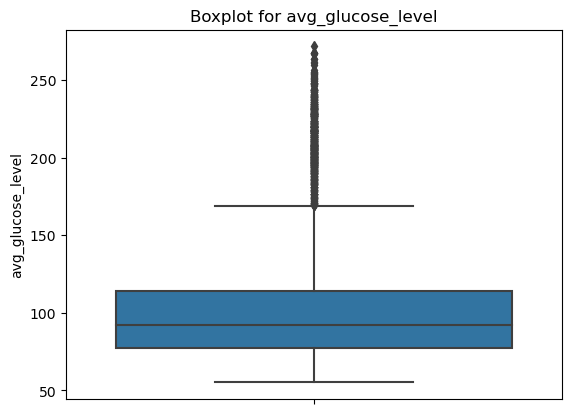

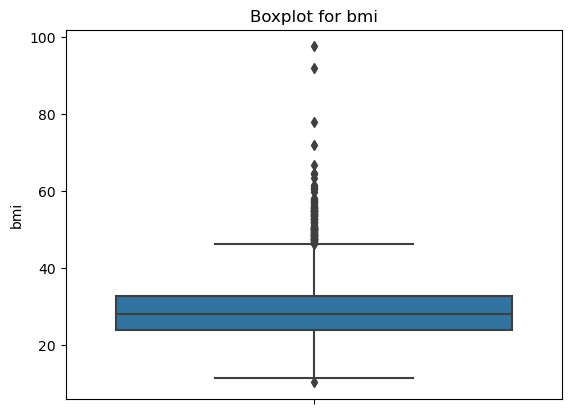

In [11]:
print("Boxplots for Numerical Columns")
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_cols:
    sns.boxplot(y=store[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Count Plots for Categorical Columns


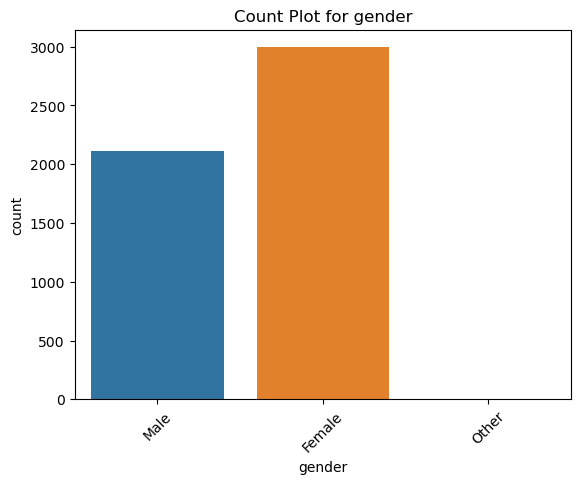

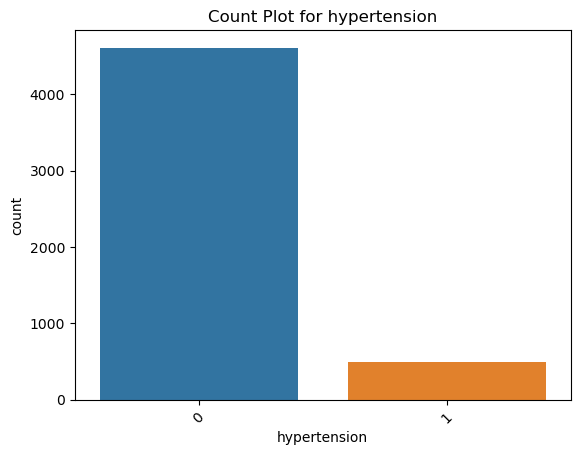

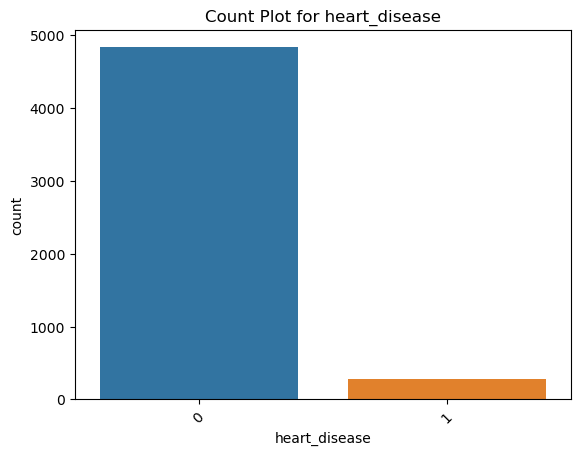

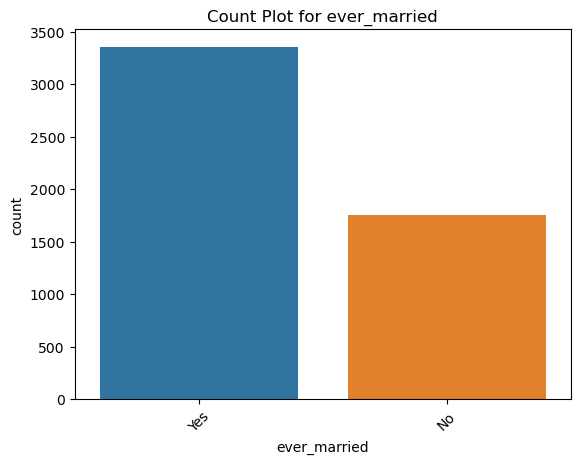

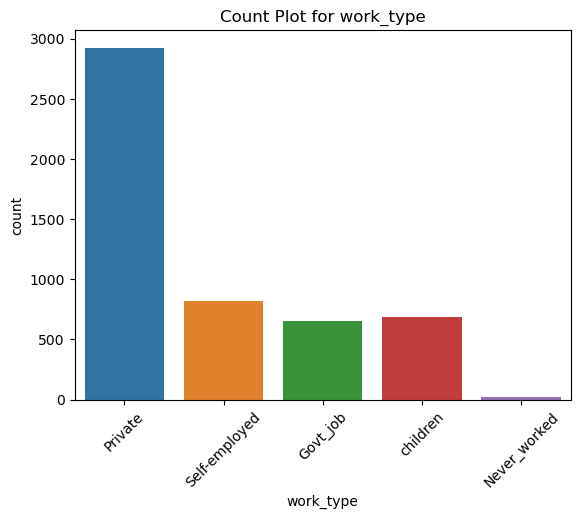

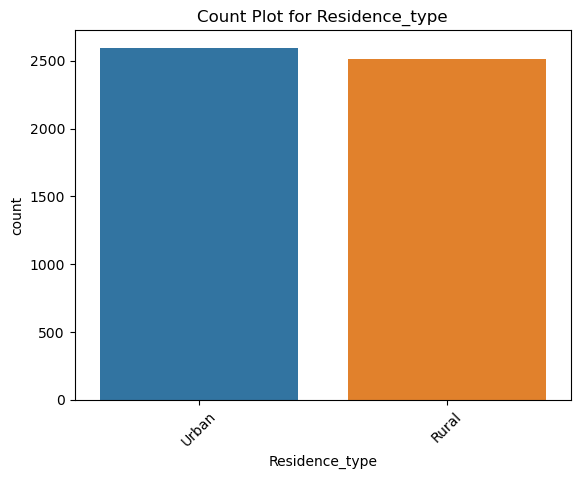

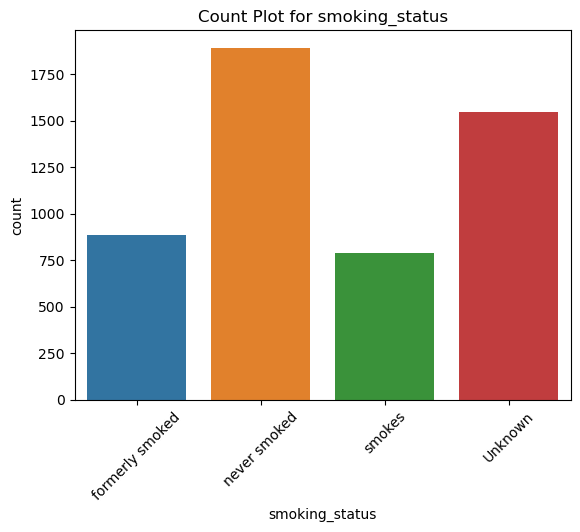

In [12]:
print("Count Plots for Categorical Columns")
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    sns.countplot(x=col, data=store)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

Pairplot for Numerical Features


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


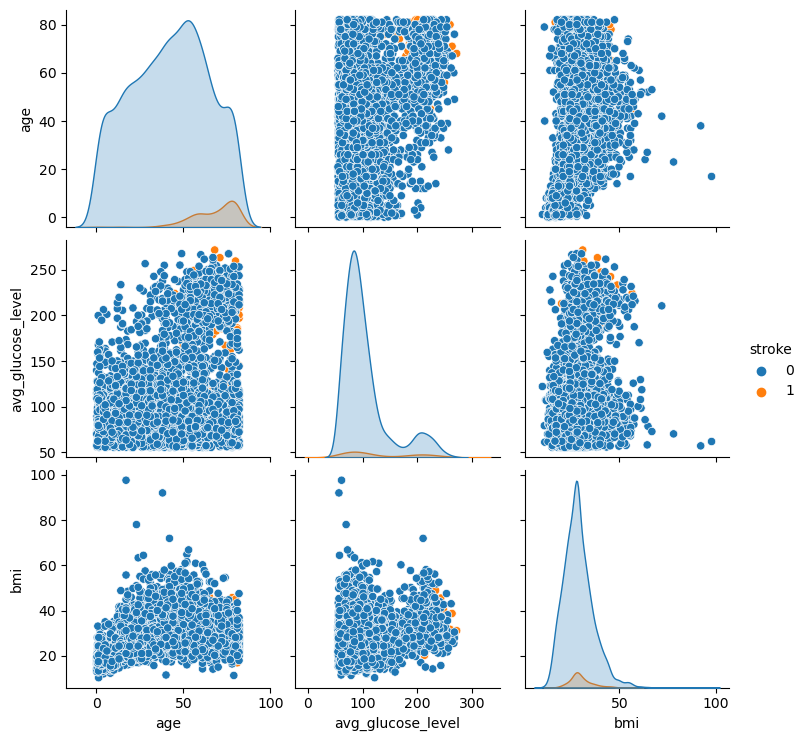

In [13]:
print("Pairplot for Numerical Features")
sns.pairplot(store[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()


Bar Plot: Stroke Count by Gender


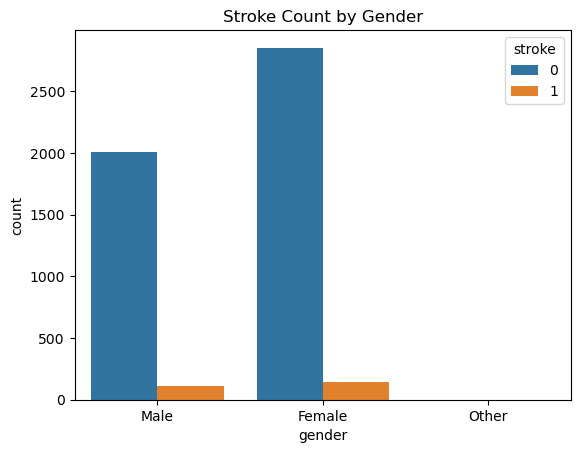

In [14]:
print("Bar Plot: Stroke Count by Gender")
sns.countplot(x='gender', hue='stroke', data=store)
plt.title("Stroke Count by Gender")
plt.show()

Scatterplot: BMI vs Avg Glucose Level


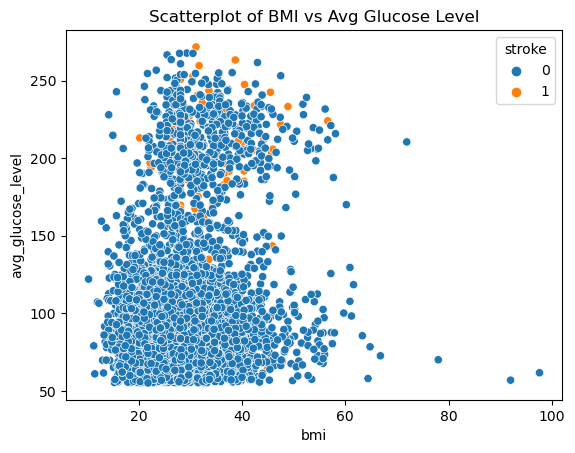

In [15]:
print("Scatterplot: BMI vs Avg Glucose Level")
sns.scatterplot(x='bmi', y='avg_glucose_level', data=store, hue='stroke')
plt.title("Scatterplot of BMI vs Avg Glucose Level")
plt.show()

In [16]:

#currently im using label encoding for this one because yeah
store['gender'] = store['gender'].map({'Male':0, 'Female':1})
store['ever_married'] =store['ever_married'].map({'No': 0, 'Yes': 1})
store['Residence_type'] = store['Residence_type'].map({'Urban': 0, 'Rural': 1})

#one-hot encoding
store['Private'] = (store['work_type'] == 'Private').astype(int)
store['Self-employed'] = (store['work_type'] == 'Self-employed').astype(int)
store['Govt_job'] = (store['work_type'] == 'Govt_job').astype(int)


store['formerly_smoked'] = (store['smoking_status'] == 'formerly smoked').astype(int)
store['never_smoked'] = (store['smoking_status'] == 'never smoked').astype(int)
store['has_smokes'] = (store['smoking_status'] == 'smokes').astype(int)
store['smoke_Unknown'] = (store['smoking_status'] == 'Unknown').astype(int)

store.drop(columns=['smoking_status','work_type'],inplace = True)



In [17]:
store.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,formerly_smoked,never_smoked,has_smokes,smoke_Unknown
0,0.0,67.0,0,1,1,0,228.69,36.6,1,1,0,0,1,0,0,0
1,1.0,61.0,0,0,1,1,202.21,28.1,1,0,1,0,0,1,0,0
2,0.0,80.0,0,1,1,1,105.92,32.5,1,1,0,0,0,1,0,0
3,1.0,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,1,0
4,1.0,79.0,1,0,1,1,174.12,24.0,1,0,1,0,0,1,0,0


Correlation Heatmap


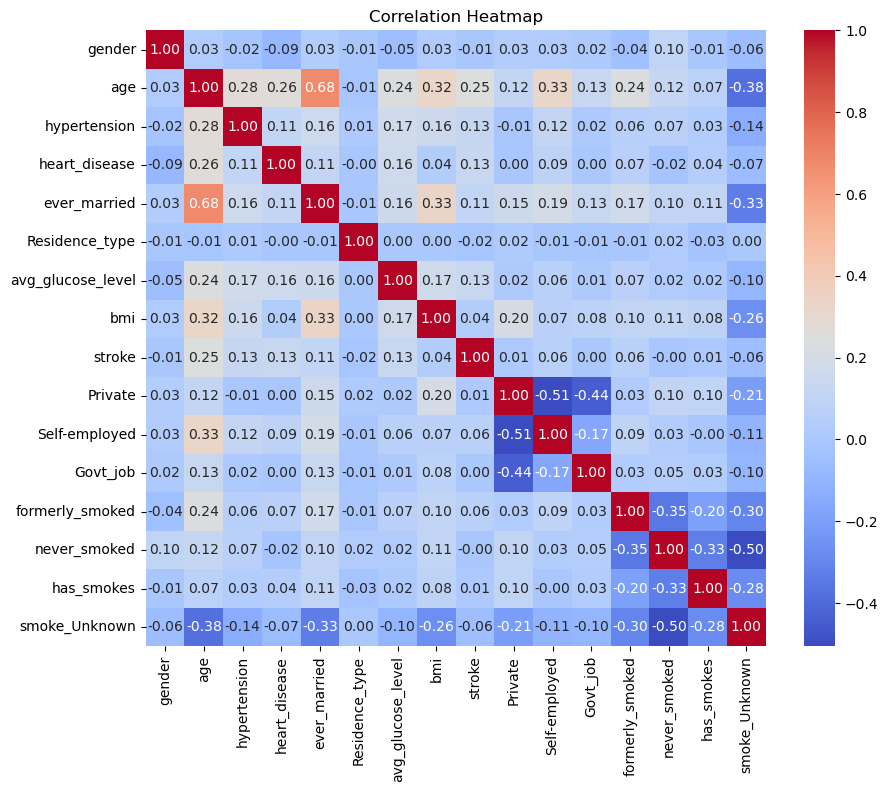

In [18]:
print("Correlation Heatmap")
plt.figure(figsize=(10, 8))
sns.heatmap(store.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
numerical_cols = ['avg_glucose_level', 'bmi']
store[numerical_cols] = RobustScaler().fit_transform(store[numerical_cols])

In [20]:
X = store.drop('stroke',axis=1)
y = store['stroke']

X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size=0.2,random_state=42)